<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230324.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta
import os
import re
from functools import reduce
from collections import defaultdict
from scipy import stats 
from scipy.stats import norm

# Customer Analysis

In [6]:
os.listdir()

['.config',
 '1_order_payments_dataset.csv',
 'sample-sales-data.csv',
 'test.csv',
 'app_wau.csv',
 '1_customers_dataset.csv',
 'ab_experiment.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'online_retail.xlsx',
 'bz_data_analyis.csv',
 'groceries.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'cookie_cats.csv',
 'match_result_test.csv',
 'online_retail_II.xlsx',
 'ecommerce-data.csv',
 '1_orders_dataset.csv',
 'sales_vs_discount.csv',
 'sales_data_with_stores.csv',
 'mock_sales_data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sales.csv',
 'lead_conversion.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'scanner_data.csv',
 'mall_customers.csv',
 'sample_data']

In [12]:
df = pd.read_csv('sales_data_with_stores.csv')
df['rev_week'] = df['cost'] * df['last_week_sales']
df['rev_month'] = df['cost'] * df['last_month_sales']
df['stock_week'] = [round(a/b*100,2) for a, b in zip(df['last_week_sales'], df['stock_qty'])]
df['stock_month'] = [round(a/b*100,2) for a, b in zip(df['last_month_sales'], df['stock_qty'])]
df.head()

,store,product_group,product_code,stock_qty,cost,price,last_week_sales,last_month_sales,rev_week,rev_month,stock_week,stock_month
0,Violet,PG2,4187,498,420.76,569.91,13,58,5469.88,24404.08,2.61,11.65
1,Rose,PG2,4195,473,545.64,712.41,16,58,8730.24,31647.12,3.38,12.26
2,Violet,PG2,4204,968,640.42,854.91,22,88,14089.24,56356.96,2.27,9.09
3,Daisy,PG2,4219,241,869.69,1034.55,14,45,12175.66,39136.05,5.81,18.67
4,Daisy,PG2,4718,1401,12.54,26.59,50,285,627.00,3573.90,3.57,20.34


In [10]:
df[['store','product_group','product_code']].value_counts()

store   product_group  product_code
Daisy   PG1            1112            1
Violet  PG1            1225            1
Rose    PG6            6994            1
                       7223            1
                       7688            1
                                      ..
Daisy   PG5            8839            1
                       8843            1
                       8866            1
                       8873            1
Violet  PG6            9844            1
Length: 1000, dtype: int64

In [20]:
cnt_rev = df.groupby(['product_group','product_code'])[['rev_week','rev_month']].sum().reset_index()
cnt_rev['week_month_ratio'] = [round(a/b*100,2) for a,b in zip(cnt_rev['rev_week'],cnt_rev['rev_month'])]
cnt_rev['product_code'] = cnt_rev['product_code'].astype('category')
cnt_rev.head()

,product_group,product_code,rev_week,rev_month,week_month_ratio
0,PG1,1112,1161.6,3854.4,30.14
1,PG1,1113,7345.8,27096.3,27.11
2,PG1,1116,1324.4,3405.6,38.89
3,PG1,1131,708.4,2587.2,27.38
4,PG1,1133,693.0,3157.0,21.95


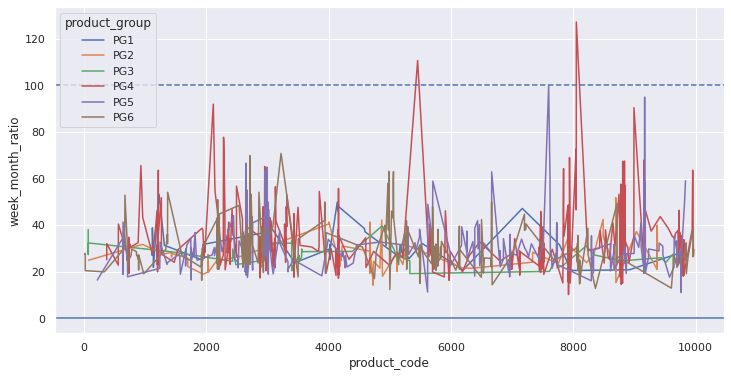

In [23]:
sns.set(rc = {'figure.figsize':[12,6]})
sns.lineplot(data = cnt_rev, x = 'product_code', y = 'week_month_ratio', hue = 'product_group')
plt.axhline(y = 0)
plt.axhline(y = 100, linestyle = '--')
plt.show()

/usr/local/lib/python3.9/dist-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


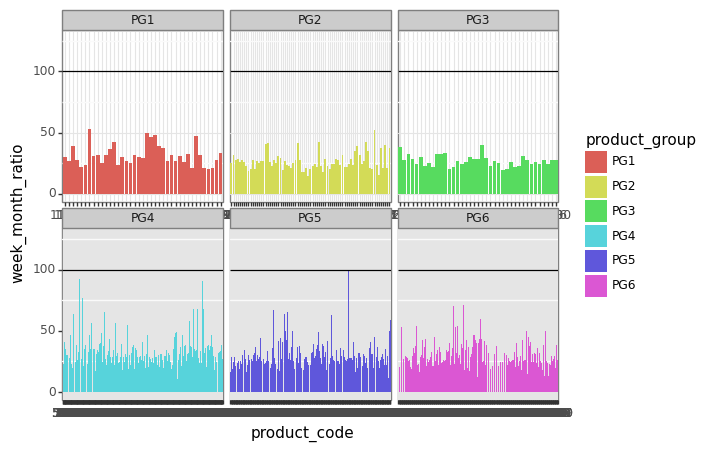

<ggplot: (8764852373950)>

In [29]:
(
    ggplot(cnt_rev, aes('product_code', 'week_month_ratio', fill = 'product_group')) +
    gg.geom_col() +
    gg.geom_hline(aes(yintercept = 100)) +
    gg.facet_wrap('~product_group', scales = 'free_x') +
    gg.theme_bw()
)

In [32]:
cnt_q = df.groupby(['product_group'])['rev_week'].quantile([.25,.5,.75,.95]).reset_index()
cnt_q.head()

,product_group,level_1,rev_week
0,PG1,0.25,910.800
1,PG1,0.50,2305.600
2,PG1,0.75,6276.500
3,PG1,0.95,15575.230
4,PG2,0.25,176.625


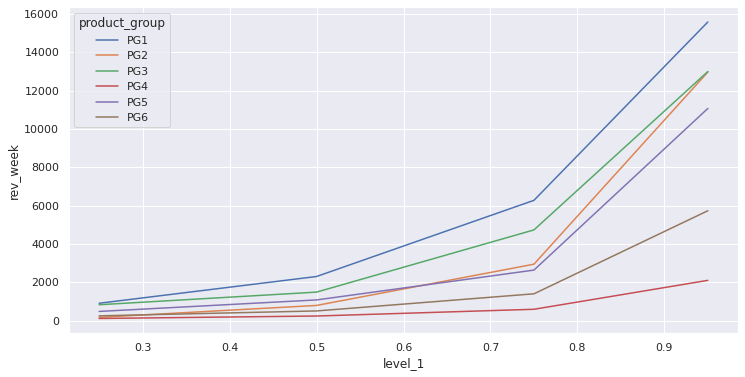

In [33]:
sns.lineplot(data = cnt_q, x = 'level_1', y = 'rev_week', hue = 'product_group')
plt.show()

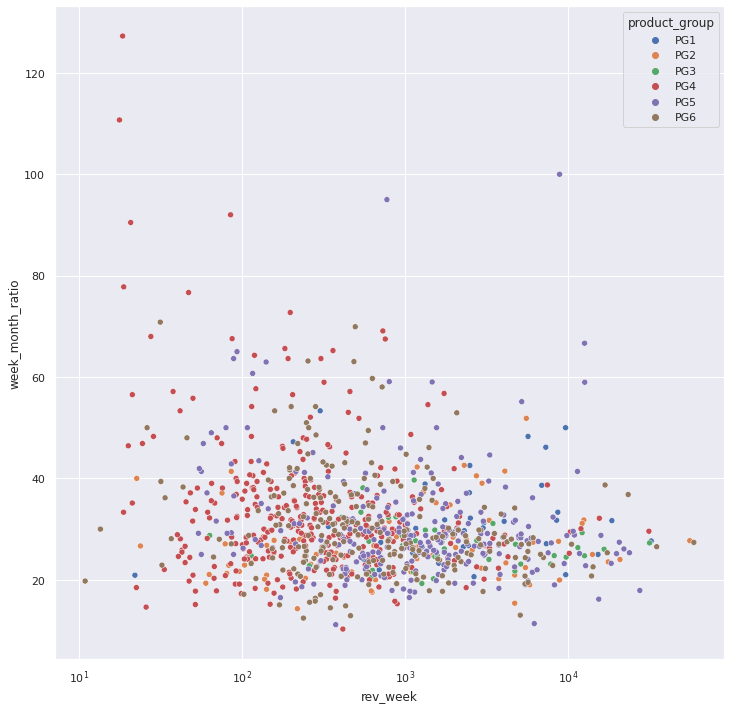

In [45]:
sns.set(rc = {'figure.figsize':[12,12]})
ax = sns.scatterplot(data = cnt_rev, x = 'rev_week', y = 'week_month_ratio', hue = 'product_group')
ax.set_xscale('log')
plt.show()

# Iterators

In [46]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [47]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [48]:
{k : [user[k] for user in users] for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}